# Approfondissement sur les distributions 1D



In [1]:
import openturns as ot
import numpy as np

## Exercise 1 : product

We want to compute the distribution of the product of a uniform distribution and a gaussian distribution.
- Define the variable `U` with Uniform distribution with bounds a = 0, b = 1.
- Define the variable `N` with Normal distribution with parameters 0 and 1.
- Define the variable `Z = U * N` using the arithmetic operator `*`.
- Plot the PDF of `Z`.

## Solution de l'exercice 1 : product


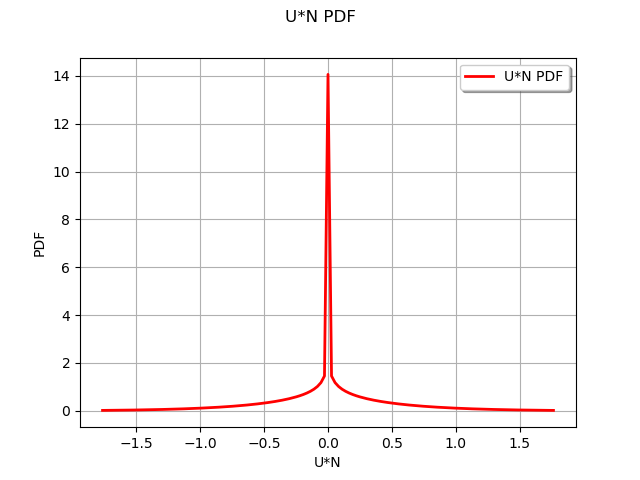

In [2]:
u = ot.Uniform(0, 1)
n = ot.Normal(0, 1)
z = u * n
z.setDescription(["U*N"])
z.drawPDF()

## Exercice 2 : axial stressed beam

We consider a simple beam stressed by a traction load F at both sides.

<img src="axial-stressed-beam.png" width="250">

The geometry is supposed to be deterministic: the diameter D is fixed to 
$$
D=0.02 \textrm{ (m)}.
$$

By definition, the yield stress is the load divided by the surface. Since the surface is $\pi D^2/4$, the stress is:
$$
S = \frac{F}{\pi D^2/4}.
$$
It is considered that failure occurs when the beam plastifies, i.e. when the axial stress gets bigger than the yield stress:
$$
R - \frac{F}{\pi D^2/4} \leq 0
$$
where $R$ is the strength.
 
Therefore, the limit state function $G$ is: 
$$
G(R,F) = R - \frac{F}{\pi D^2/4},
$$
for any $R,F\in\mathbb{R}$.
The values of the parameter $D$ implies:
$$
D^2/4 = 10^{-4},
$$
which leads to the equation:
$$
G(R,F) = R - \frac{F}{10^{-4} \pi}.
$$

We consider the following distribution functions.

| Variable | Distribution |
|--|--|
| F | Normal($\mu=750$, $\sigma=50$) [N] |
| R | LogNormal($\mu=3\times 10^6$, $\sigma=3\times 10^5$) [Pa] |

The failure probability is: 
\begin{align}
P_f &= \text{Prob}(G(R,F) \leq 0).
\end{align}

The exact $P_f$ is 
$$
P_f = 0.02920.
$$

The goal of the exercise is to compute $P_f$. 

- Define the random variable `F` associated with $F$. Draw its PDF.
- Define the random variable `R` associated with $R$. To do this, use the `LogNormalMuSigma` class. Draw its PDF.
- Define the deterministic variable `D` associated with the beam diameter.
- Define the random variable `G` associated with the equation $G = R - \frac{F}{\pi D^2/4}$, using the arithmetic operator `-`.
- Compute the probability $P_f = \text{Prob}(G \leq 0)$.

## Solution de l'exercice 2 : axial stressed beam

Create the variable F Normal distribution 1D.

In [3]:
F = ot.Normal(750., 50.)
F.setName('Traction_load')
F.setDescription('F')

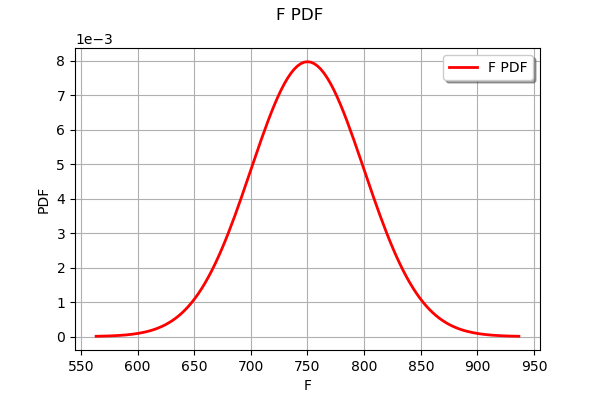

In [4]:
F.drawPDF()

Create the variable R : LogNormal distribution 1D, parameterized by its mean and standard deviation. 

In [5]:
R = ot.LogNormalMuSigma(3.e6, 3.e5, 0.0).getDistribution()
R.setName('Yield strength')
R.setDescription('R')

In [20]:
R.getStandardDeviation()

class=Point name=Unnamed dimension=1 values=[300000]

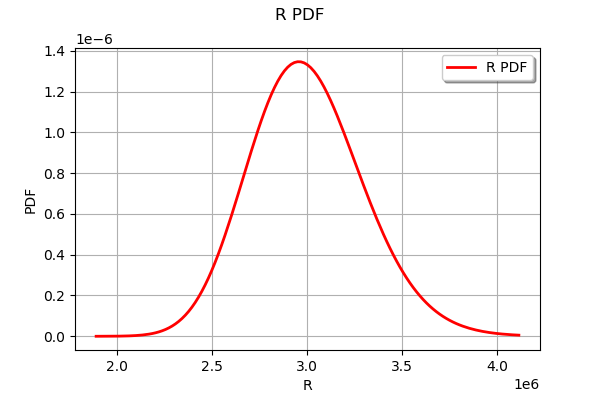

In [7]:
R.drawPDF()

Define D.

In [8]:
D = 0.02

Define the random variable G using the arithmetic operator `-`

In [9]:
G = R - F/(np.pi * D**2/4)

Finally, compute the probability.

In [10]:
pf = G.computeCDF(0)
pf

0.02919819462483051

## Exercice 3 : une autre distribution uniforme

L'objectif de cet exercice est d'utiliser la classe `PythonDistribution` pour créer la nouvelle distribution `UDistribution` implémentant la loi uniforme.

La fonction de répartition de la loi uniforme est:
$$
P(X\leq x) = 
\left\{
\begin{array}{l}
0 \textrm{ si } x\leq a, \\
\frac{x-a}{b-a} \textrm{ si } x\leq b, \\
1 \textrm{ sinon}.
\end{array}
\right.
$$

- Créer la classe `UDistribution` dérivant de la classe `PythonDistribution`.
- Créer le constructeur de la classe, c'est à dire la méthode `__init__`.
- Créer la méthode `computeCDF` qui calcule la fonction de répartition.

Pour vous aider, nous vous fournissons un squelette de solution, dans lequel vous compléterez les sections de code `TODO`.
`
class UDistribution(ot.PythonDistribution):
    def __init__(self, a, b):
        super(UDistribution, self).__init__(TODO)
        TODO
    def computeCDF(self, x):
        u = x[0]
        if TODO:
            p = TODO
        elif TODO:
            p = TODO
        else:
            p = TODO
        return p
`

## Solution de l'exercice 3 : une autre distribution uniforme

In the following example, we define the `U` distribution, another implementation of the uniform distribution. This time, we only define the `computeCDF` method.

In [11]:
class UDistribution(ot.PythonDistribution):
    def __init__(self, a, b):
        super(UDistribution, self).__init__(1)
        self.a = a
        self.b = b
    def computeCDF(self, x):
        u = x[0]
        if u <= self.a:
            p = 0.0
        elif u < self.b:
            p = (u - self.a) / (self.b - self.a)
        else:
            p = 1.0
        return p

In [12]:
U = ot.Distribution(UDistribution(-1, 1))
U.setDescription(["U"])

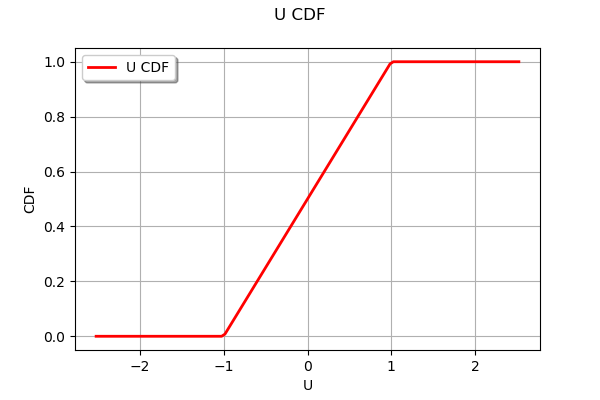

In [13]:
U.drawCDF()

The `drawPDF` plots the PDF. This requires the derivative, which is approximated based on finite differences of the CDF.

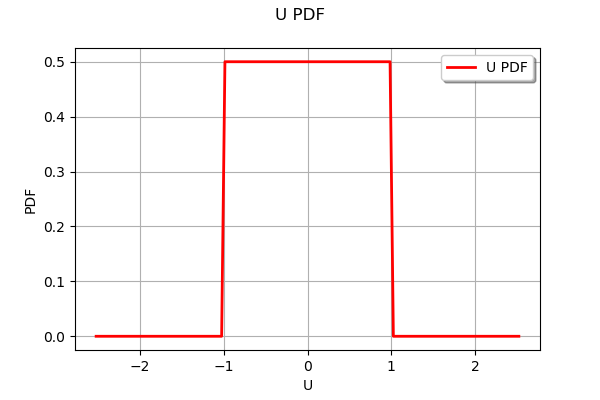

In [14]:
U.drawPDF()

## Exercice 4 : un débit positif

On considère la variable Q associée au débit d'une rivière ($m^3/s$). On fait l'hypothèse qu'il s'agit du débit maximal annuel. C'est pourquoi nous choisissons de modéliser cette variable par la loi de Gumbel de paramètres suivants :
- échelle=500, 
- mode=900.

De plus, le débit est une variable positive de telle sorte que la distribution doit être tronquée avec une borne inférieure.

L'objectif de cet exercice est de définir la variable aléatoire `Q` associée à cette distribution.

- Utiliser la classe `GumbelAB` pour définir les paramètres de la loi de Gumbel associée. 
- Utiliser la classe `ParametrizedDistribution` pour créer la variable `Quntruncated` associée à la variable non tronquée.
- Dessiner la PDF de `Quntruncated`.
- Utiliser la classe `TruncatedDistribution` pour créer la variable `Q` associée à la loi de Gumbel tronquée. 
- Dessiner la PDF de `Q` : que remarquez-vous ?

## Solution de l'exercice 4 : un débit positif

In [15]:
myParam = ot.GumbelAB(900., 500.)

In [16]:
Quntruncated = ot.ParametrizedDistribution(myParam)

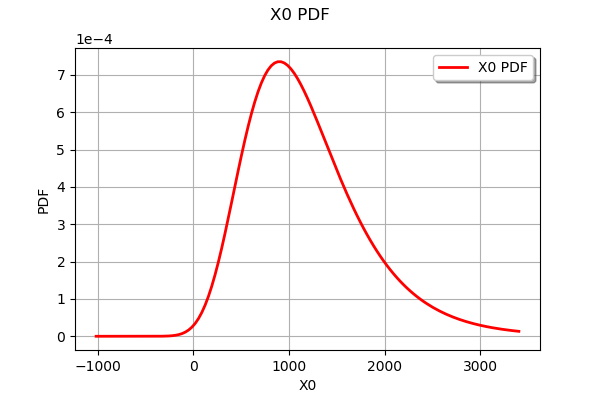

In [17]:
Quntruncated.drawPDF()

In [18]:
Q = ot.TruncatedDistribution(Quntruncated, 0., ot.TruncatedDistribution.LOWER)

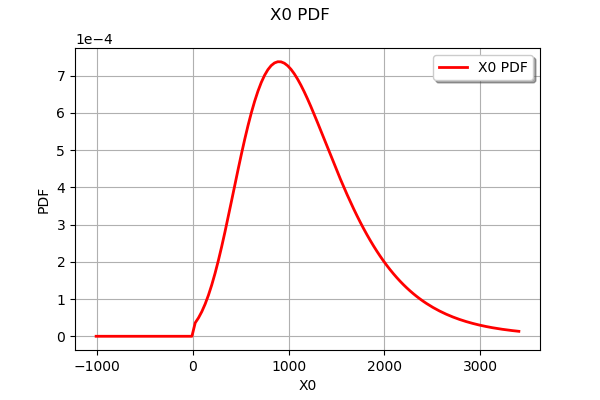

In [19]:
Q.drawPDF()

On remarque une discontinuité en $Q=0$ dû à la troncature. 